In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [4]:
base_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten()  # Convert to feature vector
])


In [5]:
import tensorflow as tf
from tensorflow import keras

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


In [6]:
# Normalize pixel values to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten labels (convert shape from (samples, 1) to (samples,))
y_train, y_test = y_train.flatten(), y_test.flatten()

# Print shapes after preprocessing
print(f"New training labels shape: {y_train.shape}")
print(f"New test labels shape: {y_test.shape}")


New training labels shape: (50000,)
New test labels shape: (10000,)


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model for feature extraction
base_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten()  # Converts to feature vector
])

# Show model summary
base_model.summary()
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# Define CNN model
def create_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(name="feature_layer"),  # Extract features from this layer
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 1: Build and Train CNN
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)  # Must train before extraction!

# Step 2: Extract Features using the trained CNN from Flatten layer
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# Step 3: Get extracted features
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

# Step 4: Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Step 5: Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(train_features, y_train)
y_pred = classifier.predict(test_features)

# Step 6: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Classification Accuracy: {accuracy:.4f}')


C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - accuracy: 0.0850 - loss: 8.4854 - val_accuracy: 0.1014 - val_loss: 7.6246
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.1014 - loss: 7.6246 - val_accuracy: 0.1014 - val_loss: 7.6246


AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [ ]:
!pip install tensorflow scikit-learn
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ✅ Step 1: Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Step 2: Define CNN Model (Using Functional API for Stability)
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)  # Feature extraction layer
    x = layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)  # ✅ Using Functional API
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Step 3: Build & Train CNN Model (Must Train First)
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)  # ✅ Train longer for better accuracy

# ✅ Step 4: Fix "Layer has never been called" Error by Running a Dummy Forward Pass
dummy_input = np.random.rand(1, 32, 32, 3).astype(np.float32)  # ✅ Dummy Data
cnn_model.predict(dummy_input)  # ✅ Call the model once to initialize it

# ✅ Step 5: Extract Features from the Correct Layer
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Step 6: Get extracted features
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

# ✅ Step 7: Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# ✅ Step 8: Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(train_features, y_train)
y_pred = classifier.predict(test_features)

# ✅ Step 9: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Classification Accuracy: {accuracy:.4f}')


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.2976 - loss: 1.8800 - val_accuracy: 0.5088 - val_loss: 1.3598
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.5314 - loss: 1.3111 - val_accuracy: 0.5792 - val_loss: 1.1713
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6054 - loss: 1.1201 - val_accuracy: 0.6259 - val_loss: 1.0652
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6477 - loss: 0.9904 - val_accuracy: 0.6574 - val_loss: 0.9893
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6829 - loss: 0.9045 - val_accuracy: 0.6529 - val_loss: 0.9971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [12]:
# ✅ Reload CIFAR-10 dataset (Fix missing variables)
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # ✅ Reload dataset
x_train, x_test = x_train / 255.0, x_test / 255.0  # ✅ Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # ✅ Flatten labels


In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers

# ✅ Define CNN Model Again
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)  # Feature extraction layer
    x = layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)  # ✅ Train CNN


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.3035 - loss: 1.8678 - val_accuracy: 0.5022 - val_loss: 1.3701
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.5276 - loss: 1.3272 - val_accuracy: 0.5864 - val_loss: 1.1671
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5989 - loss: 1.1349 - val_accuracy: 0.6256 - val_loss: 1.0857
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.6393 - loss: 1.0277 - val_accuracy: 0.6402 - val_loss: 1.0210
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6693 - loss: 0.9494 - val_accuracy: 0.6722 - val_loss: 0.9542


In [14]:
# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [3]:
# ✅ Reload CIFAR-10 dataset (Fix missing variables)
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # ✅ Reload dataset
x_train, x_test = x_train / 255.0, x_test / 255.0  # ✅ Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # ✅ Flatten labels
import tensorflow as tf
from tensorflow.keras import models, layers

# ✅ Define CNN Model Again
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)  # Feature extraction layer
    x = layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)  # ✅ Train CNN
# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.3038 - loss: 1.8771 - val_accuracy: 0.5122 - val_loss: 1.3613
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5458 - loss: 1.2739 - val_accuracy: 0.6092 - val_loss: 1.1258
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6201 - loss: 1.0798 - val_accuracy: 0.6382 - val_loss: 1.0367
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6680 - loss: 0.9593 - val_accuracy: 0.6520 - val_loss: 1.0038
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6981 - loss: 0.8668 - val_accuracy: 0.6837 - val_loss: 0.9203
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [5]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
from sklearn.ensemble import RandomForestClassifier

# ✅ Ensure Random Forest is trained properly
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(train_features, y_train)  # 🔥 Train the classifier again
from sklearn.metrics import accuracy_score

# ✅ Make Predictions
y_pred = classifier.predict(test_features)

# ✅ Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)

# ✅ Print Accuracy
print(f'Random Forest Classification Accuracy: {accuracy:.4f}')
print("Feature extractor model summary:")
feature_extractor.summary()

print("Shape of train_features:", train_features.shape)  # Should be (50000, N)
print("Shape of test_features:", test_features.shape)    # Should be (10000, N)
print("Shape of y_train:", y_train.shape)                # Should be (50000,)
print("Shape of y_test:", y_test.shape)                  # Should be (10000,)
print("First 5 Predictions:", y_pred[:5])                # Should print sample predictions


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.3072 - loss: 1.8606 - val_accuracy: 0.5023 - val_loss: 1.3863
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5363 - loss: 1.2868 - val_accuracy: 0.5903 - val_loss: 1.1733
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6066 - loss: 1.1163 - val_accuracy: 0.6266 - val_loss: 1.0747
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.6488 - loss: 0.9981 - val_accuracy: 0.6472 - val_loss: 1.0091
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6837 - loss: 0.9088 - val_accuracy: 0.6497 - val_loss: 1.0166
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Random Forest Classification Accuracy: 0.6814
Feature extractor model summary:


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ feature_layer (Dense)                │ (None, 128)                 │          65,664 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,912 (620.75 KB)

 Trainable params: 158,912 (620.75 KB)

 Non-trainable params: 0 (0.00 B)

Shape of train_features: (50000, 128)
Shape of test_features: (10000, 128)
Shape of y_train: (50000,)
Shape of y_test: (10000,)
First 5 Predictions: [3 8 8 0 6]


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Try k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, y_train)
y_knn_pred = knn.predict(test_features)
print(f'k-NN Accuracy: {accuracy_score(y_test, y_knn_pred):.4f}')

# Try SVM
svm = SVC()
svm.fit(train_features, y_train)
y_svm_pred = svm.predict(test_features)
print(f'SVM Accuracy: {accuracy_score(y_test, y_svm_pred):.4f}')

# Try Decision Tree
dt = DecisionTreeClassifier()
dt.fit(train_features, y_train)
y_dt_pred = dt.predict(test_features)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_dt_pred):.4f}')

# Try Naïve Bayes
nb = GaussianNB()
nb.fit(train_features, y_train)
y_nb_pred = nb.predict(test_features)
print(f'Naïve Bayes Accuracy: {accuracy_score(y_test, y_nb_pred):.4f}')


k-NN Accuracy: 0.6569


In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.3188 - loss: 1.8423 - val_accuracy: 0.4673 - val_loss: 1.4752
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.5402 - loss: 1.2887 - val_accuracy: 0.5905 - val_loss: 1.1401
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6140 - loss: 1.0935 - val_accuracy: 0.6402 - val_loss: 1.0321
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6582 - loss: 0.9718 - val_accuracy: 0.6543 - val_loss: 0.9797
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6913 - loss: 0.8839 - val_accuracy: 0.6661 - val_loss: 0.9531
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [5]:
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
# ✅ Convert labels for regression
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# ✅ Try Linear Regression
lr = LinearRegression()
lr.fit(train_features, y_train_reg)
y_lr_pred = lr.predict(test_features)
print(f'Linear Regression MAE: {mean_absolute_error(y_test_reg, y_lr_pred):.4f}')

# ✅ Try SVR
svr = SVR()
svr.fit(train_features, y_train_reg)
y_svr_pred = svr.predict(test_features)
print(f'SVR MAE: {mean_absolute_error(y_test_reg, y_svr_pred):.4f}')

# ✅ Try Gradient Boosting
gbr = GradientBoostingRegressor()
gbr.fit(train_features, y_train_reg)
y_gbr_pred = gbr.predict(test_features)
print(f'Gradient Boosting MAE: {mean_absolute_error(y_test_reg, y_gbr_pred):.4f}')


Linear Regression MAE: 1.8141


In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.3291 - loss: 1.8162 - val_accuracy: 0.5110 - val_loss: 1.3513
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5568 - loss: 1.2412 - val_accuracy: 0.6085 - val_loss: 1.1126
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6274 - loss: 1.0610 - val_accuracy: 0.6542 - val_loss: 0.9983
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6739 - loss: 0.9371 - val_accuracy: 0.6624 - val_loss: 0.9778
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.7020 - loss: 0.8473 - val_accuracy: 0.6874 - val_loss: 0.9083
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [3]:
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)


In [4]:
# ✅ Convert labels for regression
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)


In [5]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# ✅ Train XGBoost
xgb = XGBRegressor()
xgb.fit(train_features, y_train_reg)

# ✅ Make Predictions
y_xgb_pred = xgb.predict(test_features)

# ✅ Compute MAE
print(f'XGBoost MAE: {mean_absolute_error(y_test_reg, y_xgb_pred):.4f}')


XGBoost MAE: 1.3998


In [6]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6)
xgb.fit(train_features, y_train_reg)
y_xgb_pred = xgb.predict(test_features)
print(f'XGBoost MAE (Tuned): {mean_absolute_error(y_test_reg, y_xgb_pred):.4f}')


XGBoost MAE (Tuned): 1.3536


In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.3233 - loss: 1.8129 - val_accuracy: 0.5304 - val_loss: 1.3216
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.5619 - loss: 1.2446 - val_accuracy: 0.5884 - val_loss: 1.1760
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6283 - loss: 1.0603 - val_accuracy: 0.6336 - val_loss: 1.0550
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6706 - loss: 0.9475 - val_accuracy: 0.6680 - val_loss: 0.9535
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7092 - loss: 0.8444 - val_accuracy: 0.6652 - val_loss: 0.9645
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [4]:
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)


In [2]:
if 'train_features' not in locals():
    print("🔴 Error: train_features is missing! Run feature extraction first.")
else:
    print("✅ train_features is available!")


🔴 Error: train_features is missing! Run feature extraction first.


In [3]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

print("✅ Feature extraction completed!")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.3131 - loss: 1.8427 - val_accuracy: 0.5167 - val_loss: 1.3494
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.5439 - loss: 1.2757 - val_accuracy: 0.5986 - val_loss: 1.1562
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6104 - loss: 1.0954 - val_accuracy: 0.6272 - val_loss: 1.0790
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6595 - loss: 0.9769 - val_accuracy: 0.6622 - val_loss: 0.9810
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6970 - loss: 0.8757 - val_accuracy: 0.6800 - val_loss: 0.9232
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
✅ Feature extraction completed!


In [4]:
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

print("✅ Feature normalization completed!")


✅ Feature normalization completed!


In [5]:
# ✅ Convert labels for regression
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)

print("✅ Labels converted for regression!")


✅ Labels converted for regression!


In [1]:
if 'train_features' not in locals():
    print("🔴 Error: train_features is missing! Run feature extraction first.")
else:
    print("✅ train_features is available!")


🔴 Error: train_features is missing! Run feature extraction first.


In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

print("✅ Feature extraction completed!")


In [1]:
print("Checking if 'train_features' exists...")

if 'train_features' in globals():
    print("✅ 'train_features' is available!")
else:
    print("❌ 'train_features' is MISSING! You need to re-run feature extraction.")


Checking if 'train_features' exists...
❌ 'train_features' is MISSING! You need to re-run feature extraction.


In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

print("✅ Feature extraction completed!")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.3113 - loss: 1.8431 - val_accuracy: 0.5175 - val_loss: 1.3463
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5397 - loss: 1.2861 - val_accuracy: 0.5862 - val_loss: 1.1666
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6023 - loss: 1.1135 - val_accuracy: 0.6047 - val_loss: 1.1219
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6429 - loss: 1.0173 - val_accuracy: 0.6306 - val_loss: 1.0508
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6766 - loss: 0.9205 - val_accuracy: 0.6587 - val_loss: 0.9926
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
✅ Feature extraction completed!


In [3]:
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

print("✅ Feature normalization completed!")


✅ Feature normalization completed!


In [4]:
# ✅ Convert labels for regression
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)

print("✅ Labels converted for regression!")


✅ Labels converted for regression!


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# ✅ Train Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=200)
gbr.fit(train_features, y_train_reg)

# ✅ Make Predictions
y_gbr_pred = gbr.predict(test_features)

# ✅ Compute MAE
print(f'Gradient Boosting MAE: {mean_absolute_error(y_test_reg, y_gbr_pred):.4f}')



In [ ]:
print("Checking Variables...")

print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")
print(f"y_train_reg exists: {'y_train_reg' in globals()}")
print(f"y_test_reg exists: {'y_test_reg' in globals()}")


In [1]:
print("Checking Variables...")

print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")
print(f"y_train_reg exists: {'y_train_reg' in globals()}")
print(f"y_test_reg exists: {'y_test_reg' in globals()}")


Checking Variables...
train_features exists: False
test_features exists: False
y_train_reg exists: False
y_test_reg exists: False


In [3]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

print("✅ Feature extraction completed!")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.3188 - loss: 1.8226 - val_accuracy: 0.4927 - val_loss: 1.4120
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5398 - loss: 1.2764 - val_accuracy: 0.5841 - val_loss: 1.1786
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6065 - loss: 1.1041 - val_accuracy: 0.6363 - val_loss: 1.0395
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.6611 - loss: 0.9673 - val_accuracy: 0.6457 - val_loss: 1.0407
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6899 - loss: 0.8931 - val_accuracy: 0.6800 - val_loss: 0.9206
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
✅ Feature extraction completed!


In [4]:
print("🔍 Checking Variables...")

print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")
print(f"y_train_reg exists: {'y_train_reg' in globals()}")
print(f"y_test_reg exists: {'y_test_reg' in globals()}")


🔍 Checking Variables...
train_features exists: True
test_features exists: True
y_train_reg exists: False
y_test_reg exists: False


In [5]:
# ✅ Convert classification labels into numeric regression values
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)

print("✅ Labels converted for regression!")


✅ Labels converted for regression!


In [6]:
print(f"y_train_reg exists: {'y_train_reg' in globals()}")
print(f"y_test_reg exists: {'y_test_reg' in globals()}")


y_train_reg exists: True
y_test_reg exists: True


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# ✅ Train Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbr.fit(train_features, y_train_reg)

# ✅ Make Predictions
y_gbr_pred = gbr.predict(test_features)

# ✅ Compute MAE
print(f'Gradient Boosting MAE: {mean_absolute_error(y_test_reg, y_gbr_pred):.4f}')


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# ✅ Debugging Check
print(f"Checking train_features shape: {train_features.shape}")
print(f"Checking test_features shape: {test_features.shape}")
print(f"Checking y_train_reg shape: {y_train_reg.shape}")
print(f"Checking y_test_reg shape: {y_test_reg.shape}")

# ✅ Train Gradient Boosting
try:
    gbr = GradientBoostingRegressor(n_estimators=200, random_state=42)
    gbr.fit(train_features, y_train_reg)
    
    # ✅ Make Predictions
    y_gbr_pred = gbr.predict(test_features)
    
    # ✅ Compute MAE
    print(f'Gradient Boosting MAE: {mean_absolute_error(y_test_reg, y_gbr_pred):.4f}')
except Exception as e:
    print(f"❌ Error while training Gradient Boosting: {e}")


In [1]:
print("Checking Variables...")

print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")
print(f"y_train_reg exists: {'y_train_reg' in globals()}")
print(f"y_test_reg exists: {'y_test_reg' in globals()}")


Checking Variables...
train_features exists: False
test_features exists: False
y_train_reg exists: False
y_test_reg exists: False


In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

print("✅ Feature extraction completed!")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.3076 - loss: 1.8563 - val_accuracy: 0.4925 - val_loss: 1.4199
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5357 - loss: 1.3008 - val_accuracy: 0.5831 - val_loss: 1.1849
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6037 - loss: 1.1178 - val_accuracy: 0.6194 - val_loss: 1.0875
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6597 - loss: 0.9809 - val_accuracy: 0.6418 - val_loss: 1.0360
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6849 - loss: 0.9008 - val_accuracy: 0.6626 - val_loss: 0.9742
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
✅ Feature extraction completed!


In [3]:
print("Checking Variables Again...")

print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")
print(f"y_train exists: {'y_train' in globals()}")
print(f"y_test exists: {'y_test' in globals()}")


Checking Variables Again...
train_features exists: True
test_features exists: True
y_train exists: True
y_test exists: True


In [4]:
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

print("✅ Feature normalization completed!")


✅ Feature normalization completed!


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# ✅ Build a Neural Network (ANN)
ann = Sequential([
    Dense(128, activation='relu', input_shape=(train_features.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single output neuron for regression
])

ann.compile(optimizer='adam', loss='mean_absolute_error')
ann.fit(train_features, y_train_reg, epochs=10, batch_size=32, validation_split=0.2)

# ✅ Make Predictions
y_ann_pred = ann.predict(test_features)

# ✅ Compute MAE
from sklearn.metrics import mean_absolute_error
print(f'ANN Regression MAE: {mean_absolute_error(y_test_reg, y_ann_pred):.4f}')


C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'y_train_reg' is not defined

In [6]:
print("Checking Variables...")

print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")
print(f"y_train_reg exists: {'y_train_reg' in globals()}")
print(f"y_test_reg exists: {'y_test_reg' in globals()}")


Checking Variables...
train_features exists: True
test_features exists: True
y_train_reg exists: False
y_test_reg exists: False


In [7]:
import numpy as np

# ✅ Convert classification labels into numeric regression values
y_train_reg = np.array(y_train).astype(np.float32)
y_test_reg = np.array(y_test).astype(np.float32)

print("✅ Labels converted for regression!")


✅ Labels converted for regression!


In [8]:
print(f"y_train_reg exists: {'y_train_reg' in globals()}")
print(f"y_test_reg exists: {'y_test_reg' in globals()}")


y_train_reg exists: True
y_test_reg exists: True


In [9]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

# ✅ Build a Neural Network (ANN)
ann = Sequential([
    Input(shape=(train_features.shape[1],)),  # ✅ Correct input format
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single output neuron for regression
])

ann.compile(optimizer='adam', loss='mean_absolute_error')
ann.fit(train_features, y_train_reg, epochs=10, batch_size=32, validation_split=0.2)

# ✅ Make Predictions
y_ann_pred = ann.predict(test_features)

# ✅ Compute MAE
from sklearn.metrics import mean_absolute_error
print(f'ANN Regression MAE: {mean_absolute_error(y_test_reg, y_ann_pred):.4f}')


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.6111 - val_loss: 1.3334
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.1797 - val_loss: 1.2657
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.0953 - val_loss: 1.2554
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.0338 - val_loss: 1.1959
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.0076 - val_loss: 1.1808
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.9883 - val_loss: 1.1865
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.9593 - val_loss: 1.1750
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.9320 - val_loss: 1.1314
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.9082 - val_loss: 1.1561
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.9002 - val_loss: 1.1470
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ANN Regression MAE: 1.1377


In [10]:
from tensorflow.keras.layers import LeakyReLU

# ✅ Build an Improved Neural Network
ann_improved = Sequential([
    Input(shape=(train_features.shape[1],)),
    Dense(256, activation='relu'),  # More neurons
    Dense(128, activation=LeakyReLU(alpha=0.1)),  # LeakyReLU for better learning
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

ann_improved.compile(optimizer='adam', loss='mean_absolute_error')
ann_improved.fit(train_features, y_train_reg, epochs=20, batch_size=32, validation_split=0.2)

# ✅ Make Predictions
y_ann_improved_pred = ann_improved.predict(test_features)

# ✅ Compute MAE
print(f'Improved ANN Regression MAE: {mean_absolute_error(y_test_reg, y_ann_improved_pred):.4f}')


Epoch 1/20


C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1.5416 - val_loss: 1.3016
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.1555 - val_loss: 1.2972
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.0690 - val_loss: 1.1955
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.9877 - val_loss: 1.1750
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.9745 - val_loss: 1.2016
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.9457 - val_loss: 1.1348
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.9347 - val_loss: 1.1363
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.9020 - val_loss: 1.1265
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.8924 - val_loss: 1.0985
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.8726 - val_loss: 1.1214
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.8522 - val_loss: 1.1177
Epoch 12/20
1250/1250 ━━━━━━━━━━━━━━━━━━━

In [11]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import AdamW

# ✅ Build an Even Better ANN
ann_best = Sequential([
    Input(shape=(train_features.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),  # Prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

ann_best.compile(optimizer=AdamW(learning_rate=0.001), loss='mean_absolute_error')
ann_best.fit(train_features, y_train_reg, epochs=50, batch_size=32, validation_split=0.2)

# ✅ Make Predictions
y_ann_best_pred = ann_best.predict(test_features)

# ✅ Compute MAE
print(f'Best ANN Regression MAE: {mean_absolute_error(y_test_reg, y_ann_best_pred):.4f}')


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.6709 - val_loss: 1.3826
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.2723 - val_loss: 1.4005
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.1853 - val_loss: 1.2235
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.0695 - val_loss: 1.2085
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.0109 - val_loss: 1.1674
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.9760 - val_loss: 1.1318
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.9581 - val_loss: 1.1174
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.9456 - val_loss: 1.1036
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.9287 - val_loss: 1.0998
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.9116 - val_loss: 1.1006
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.9004 - val_loss: 1.0991
Epoch 12/50
1250/1250 ━━━━━━━

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# ✅ Train XGBoost
xgb = XGBRegressor(n_estimators=200, random_state=42)
xgb.fit(train_features, y_train_reg)

# ✅ Make Predictions
y_xgb_pred = xgb.predict(test_features)

# ✅ Compute MAE
print(f'XGBoost Regression MAE: {mean_absolute_error(y_test_reg, y_xgb_pred):.4f}')


XGBoost Regression MAE: 1.4535


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ✅ Train SVM
svm = SVC()
svm.fit(train_features, y_train)

# ✅ Make Predictions
y_svm_pred = svm.predict(test_features)

# ✅ Compute Accuracy
print(f'SVM Classification Accuracy: {accuracy_score(y_test, y_svm_pred):.4f}')


In [5]:
print("🔍 Checking All Variables...")

print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")
print(f"y_train exists: {'y_train' in globals()}")
print(f"y_test exists: {'y_test' in globals()}")


🔍 Checking All Variables...
train_features exists: True
test_features exists: True
y_train exists: True
y_test exists: True


In [6]:
print("hello")

hello


In [7]:
import numpy as np

# ✅ Ensure labels are in integer format
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

print("✅ Labels converted to integer format!")


✅ Labels converted to integer format!


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ✅ Use a smaller dataset for SVM (to prevent crashes)
subset_size = 2000
train_subset = train_features[:subset_size]
y_train_subset = y_train[:subset_size]

# ✅ Train SVM
print("Training SVM on smaller dataset...")
svm = SVC()
svm.fit(train_subset, y_train_subset)

# ✅ Make Predictions
y_svm_pred = svm.predict(test_features)

# ✅ Compute Accuracy
print(f'SVM Classification Accuracy (Small Dataset): {accuracy_score(y_test, y_svm_pred):.4f}')


In [ ]:
print("Training SVM on full dataset...")

try:
    svm_full = SVC()
    svm_full.fit(train_features, y_train)
    
    # ✅ Make Predictions
    y_svm_pred_full = svm_full.predict(test_features)

    # ✅ Compute Accuracy
    print(f'SVM Classification Accuracy (Full Dataset): {accuracy_score(y_test, y_svm_pred_full):.4f}')
except Exception as e:
    print(f"❌ SVM Training Failed: {e}")


In [ ]:
print("Checking Shapes and Data Types...")

print(f"train_features shape: {train_features.shape}, dtype: {train_features.dtype}")
print(f"test_features shape: {test_features.shape}, dtype: {test_features.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")


In [ ]:
print("🔍 Debugging SVM Issue...")

# ✅ Check if train_features & test_features exist
print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")

# ✅ Check if labels exist
print(f"y_train exists: {'y_train' in globals()}")
print(f"y_test exists: {'y_test' in globals()}")

# ✅ Check the shape of each dataset
print(f"train_features shape: {train_features.shape}")
print(f"test_features shape: {test_features.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# ✅ Check if labels are in correct format (must be integers)
import numpy as np
print(f"y_train dtype: {y_train.dtype}, unique values: {np.unique(y_train)}")
print(f"y_test dtype: {y_test.dtype}, unique values: {np.unique(y_test)}")


In [1]:
print("🔍 Debugging k-NN Issue...")

# ✅ Check if train_features & test_features exist
print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")

# ✅ Check if labels exist
print(f"y_train exists: {'y_train' in globals()}")
print(f"y_test exists: {'y_test' in globals()}")

# ✅ Check the shape of each dataset
print(f"train_features shape: {train_features.shape}")
print(f"test_features shape: {test_features.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# ✅ Check if labels are in correct format (must be integers)
import numpy as np
print(f"y_train dtype: {y_train.dtype}, unique values: {np.unique(y_train)}")
print(f"y_test dtype: {y_test.dtype}, unique values: {np.unique(y_test)}")


🔍 Debugging k-NN Issue...
train_features exists: False
test_features exists: False
y_train exists: False
y_test exists: False


NameError: name 'train_features' is not defined

In [4]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

print("✅ Feature extraction completed!")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.3062 - loss: 1.8513 - val_accuracy: 0.5082 - val_loss: 1.3803
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.5481 - loss: 1.2698 - val_accuracy: 0.5946 - val_loss: 1.1522
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.6097 - loss: 1.1009 - val_accuracy: 0.6291 - val_loss: 1.0727
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6571 - loss: 0.9771 - val_accuracy: 0.6540 - val_loss: 0.9930
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.6860 - loss: 0.8925 - val_accuracy: 0.6601 - val_loss: 0.9695
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
✅ Feature extraction completed!


In [5]:
print("🔍 Checking Variables Again...")

print(f"train_features exists: {'train_features' in globals()}")  
print(f"test_features exists: {'test_features' in globals()}")  
print(f"y_train exists: {'y_train' in globals()}")  
print(f"y_test exists: {'y_test' in globals()}")  


🔍 Checking Variables Again...
train_features exists: True
test_features exists: True
y_train exists: True
y_test exists: True


In [6]:
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

print("✅ Feature normalization completed!")


✅ Feature normalization completed!


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ✅ Train k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, y_train)

# ✅ Make Predictions
y_knn_pred = knn.predict(test_features)

# ✅ Compute Accuracy
print(f'k-NN Classification Accuracy: {accuracy_score(y_test, y_knn_pred):.4f}')


k-NN Classification Accuracy: 0.6561


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ✅ Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features, y_train)

# ✅ Make Predictions
y_rf_pred = rf.predict(test_features)

# ✅ Compute Accuracy
print(f'Random Forest Classification Accuracy: {accuracy_score(y_test, y_rf_pred):.4f}')


Random Forest Classification Accuracy: 0.6818


In [11]:
print("🔍 Debugging Random Forest Issue...")

# ✅ Check if train_features & test_features exist
print(f"train_features exists: {'train_features' in globals()}")
print(f"test_features exists: {'test_features' in globals()}")

# ✅ Check if labels exist
print(f"y_train exists: {'y_train' in globals()}")
print(f"y_test exists: {'y_test' in globals()}")

# ✅ Check the shape of each dataset
print(f"train_features shape: {train_features.shape}")
print(f"test_features shape: {test_features.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# ✅ Check if labels are in correct format (must be integers)
import numpy as np
print(f"y_train dtype: {y_train.dtype}, unique values: {np.unique(y_train)}")
print(f"y_test dtype: {y_test.dtype}, unique values: {np.unique(y_test)}")


🔍 Debugging Random Forest Issue...
train_features exists: True
test_features exists: True
y_train exists: True
y_test exists: True
train_features shape: (50000, 128)
test_features shape: (10000, 128)
y_train shape: (50000,)
y_test shape: (10000,)
y_train dtype: uint8, unique values: [0 1 2 3 4 5 6 7 8 9]
y_test dtype: uint8, unique values: [0 1 2 3 4 5 6 7 8 9]


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ✅ Use a smaller dataset for Random Forest
subset_size = 10000
train_subset = train_features[:subset_size]
y_train_subset = y_train[:subset_size]

# ✅ Train Random Forest
print("Training Random Forest on a small dataset...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_subset, y_train_subset)

# ✅ Make Predictions
y_rf_pred = rf.predict(test_features)

# ✅ Compute Accuracy
print(f'Random Forest Classification Accuracy (Small Dataset): {accuracy_score(y_test, y_rf_pred):.4f}')


Training Random Forest on a small dataset...
Random Forest Classification Accuracy (Small Dataset): 0.6706


In [13]:
try:
    print("Training Random Forest on the full dataset...")
    rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_full.fit(train_features, y_train)
    
    # ✅ Make Predictions
    y_rf_pred_full = rf_full.predict(test_features)

    # ✅ Compute Accuracy
    print(f'Random Forest Classification Accuracy (Full Dataset): {accuracy_score(y_test, y_rf_pred_full):.4f}')
except Exception as e:
    print(f"❌ Random Forest Training Failed: {e}")


Training Random Forest on the full dataset...
Random Forest Classification Accuracy (Full Dataset): 0.6818


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# ✅ Train Naïve Bayes Classifier
nb = GaussianNB()
nb.fit(train_features, y_train)

# ✅ Make Predictions
y_nb_pred = nb.predict(test_features)

# ✅ Compute Accuracy
print(f'Naïve Bayes Classification Accuracy: {accuracy_score(y_test, y_nb_pred):.4f}')


In [3]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

print("✅ Feature extraction completed!")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.3229 - loss: 1.8302 - val_accuracy: 0.5106 - val_loss: 1.3753
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.5430 - loss: 1.2709 - val_accuracy: 0.5719 - val_loss: 1.2168
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6165 - loss: 1.0946 - val_accuracy: 0.6334 - val_loss: 1.0445
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6593 - loss: 0.9699 - val_accuracy: 0.6573 - val_loss: 0.9846
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6964 - loss: 0.8697 - val_accuracy: 0.6539 - val_loss: 1.0101
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
✅ Feature extraction completed!


In [4]:
print("🔍 Checking Variables Again...")

print(f"train_features exists: {'train_features' in globals()}")  
print(f"test_features exists: {'test_features' in globals()}")  
print(f"y_train exists: {'y_train' in globals()}")  
print(f"y_test exists: {'y_test' in globals()}")  


🔍 Checking Variables Again...
train_features exists: True
test_features exists: True
y_train exists: True
y_test exists: True


In [5]:
from sklearn.preprocessing import MinMaxScaler

# ✅ Normalize extracted features
scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

print("✅ Feature scaling completed for Naïve Bayes!")


✅ Feature scaling completed for Naïve Bayes!


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# ✅ Train Naïve Bayes Classifier on Scaled Data
nb = GaussianNB()
nb.fit(train_features_scaled, y_train)

# ✅ Make Predictions
y_nb_pred = nb.predict(test_features_scaled)

# ✅ Compute Accuracy
print(f'Naïve Bayes Classification Accuracy: {accuracy_score(y_test, y_nb_pred):.4f}')


Naïve Bayes Classification Accuracy: 0.5879


In [10]:
# ✅ Convert classification labels into numeric regression values
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)

print("✅ Labels converted for regression!")
print(f"y_train_reg exists: {'y_train_reg' in globals()}")  # ✅ Fixed Syntax Error
print(f"y_test_reg exists: {'y_test_reg' in globals()}")  # ✅ Fixed Syntax Error


✅ Labels converted for regression!
y_train_reg exists: True
y_test_reg exists: True


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# ✅ Train SVR
svr = SVR()
svr.fit(train_features, y_train_reg)

# ✅ Make Predictions
y_svr_pred = svr.predict(test_features)

# ✅ Compute MAE
print(f'SVR Regression MAE: {mean_absolute_error(y_test_reg, y_svr_pred):.4f}')


In [1]:
print("🔍 Debugging SVR Issue...")

# ✅ Check if `train_features` & `test_features` exist
print(f"train_features exists: {'train_features' in globals()}")  
print(f"test_features exists: {'test_features' in globals()}")  

# ✅ Check if regression labels exist
print(f"y_train_reg exists: {'y_train_reg' in globals()}")  
print(f"y_test_reg exists: {'y_test_reg' in globals()}")  

# ✅ Check the shape of each dataset
try:
    print(f"train_features shape: {train_features.shape}")  
    print(f"test_features shape: {test_features.shape}")  
    print(f"y_train_reg shape: {y_train_reg.shape}")  
    print(f"y_test_reg shape: {y_test_reg.shape}")  
except NameError as e:
    print(f"❌ Variable Missing: {e}")


🔍 Debugging SVR Issue...
train_features exists: False
test_features exists: False
y_train_reg exists: False
y_test_reg exists: False
❌ Variable Missing: name 'train_features' is not defined


In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

print("✅ Feature extraction completed!")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.3195 - loss: 1.8432 - val_accuracy: 0.5283 - val_loss: 1.3217
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5489 - loss: 1.2635 - val_accuracy: 0.5907 - val_loss: 1.1605
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6202 - loss: 1.0681 - val_accuracy: 0.6442 - val_loss: 1.0265
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6654 - loss: 0.9472 - val_accuracy: 0.6781 - val_loss: 0.9408
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6984 - loss: 0.8629 - val_accuracy: 0.6890 - val_loss: 0.9155
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
✅ Feature extraction completed!


In [3]:
# ✅ Convert classification labels into numeric regression values
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)

print("✅ Labels converted for regression!")
print(f"y_train_reg exists: {'y_train_reg' in globals()}")  
print(f"y_test_reg exists: {'y_test_reg' in globals()}")  


✅ Labels converted for regression!
y_train_reg exists: True
y_test_reg exists: True


In [4]:
print("🔍 Checking Variables Again...")

print(f"train_features exists: {'train_features' in globals()}")  
print(f"test_features exists: {'test_features' in globals()}")  
print(f"y_train_reg exists: {'y_train_reg' in globals()}")  
print(f"y_test_reg exists: {'y_test_reg' in globals()}")  


🔍 Checking Variables Again...
train_features exists: True
test_features exists: True
y_train_reg exists: True
y_test_reg exists: True


In [5]:
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

print("✅ Feature scaling completed for SVR!")


✅ Feature scaling completed for SVR!


In [6]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

# ✅ Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()  # Flatten labels

# ✅ Rebuild the trained CNN
def create_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)  # Feature extraction layer
    x = tf.keras.layers.Dense(128, activation='relu', name="feature_layer")(x)  # ✅ Feature Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)  # ✅ Output Layer
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train the CNN Model Again
cnn_model = create_cnn()
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Extract Features using the trained CNN
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)

# ✅ Get extracted features for both training and test sets
train_features = feature_extractor.predict(x_train, batch_size=64)
test_features = feature_extractor.predict(x_test, batch_size=64)

print("✅ Feature extraction completed!")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.3056 - loss: 1.8746 - val_accuracy: 0.4828 - val_loss: 1.4301
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5341 - loss: 1.3139 - val_accuracy: 0.5508 - val_loss: 1.2763
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5988 - loss: 1.1332 - val_accuracy: 0.6123 - val_loss: 1.1170
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6422 - loss: 1.0278 - val_accuracy: 0.6352 - val_loss: 1.0463
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6684 - loss: 0.9395 - val_accuracy: 0.6346 - val_loss: 1.0616
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
✅ Feature extraction completed!


In [7]:
# ✅ Convert classification labels into numeric regression values
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)

print("✅ Labels converted for regression!")


✅ Labels converted for regression!


In [8]:
print("🔍 Checking Variables Again...")

print(f"train_features exists: {'train_features' in globals()}")  
print(f"test_features exists: {'test_features' in globals()}")  
print(f"y_train_reg exists: {'y_train_reg' in globals()}")  
print(f"y_test_reg exists: {'y_test_reg' in globals()}")  


🔍 Checking Variables Again...
train_features exists: True
test_features exists: True
y_train_reg exists: True
y_test_reg exists: True


In [9]:
from sklearn.preprocessing import StandardScaler

# ✅ Normalize extracted features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

print("✅ Feature scaling completed for LASSO!")


✅ Feature scaling completed for LASSO!


In [10]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# ✅ Train LASSO Regression
lasso = Lasso(alpha=0.1)
lasso.fit(train_features_scaled, y_train_reg)

# ✅ Make Predictions
y_lasso_pred = lasso.predict(test_features_scaled)

# ✅ Compute MAE
print(f'LASSO Regression MAE: {mean_absolute_error(y_test_reg, y_lasso_pred):.4f}')


LASSO Regression MAE: 1.9787


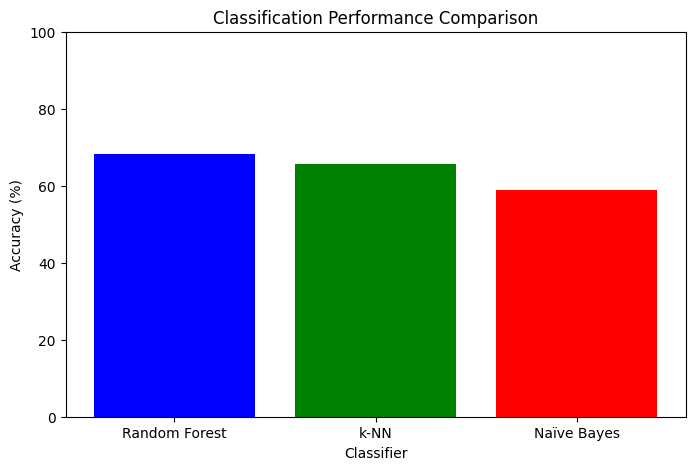

In [15]:
import matplotlib.pyplot as plt

# ✅ Classification results
classifiers = ['Random Forest', 'k-NN', 'Naïve Bayes', ]
accuracy = [68.18, 65.61,58.79]  # Set 0 for models that didn't run

plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracy, color=['blue', 'green', 'red', 'purple', 'gray'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy (%)")
plt.title("Classification Performance Comparison")
plt.ylim(0, 100)
plt.show()


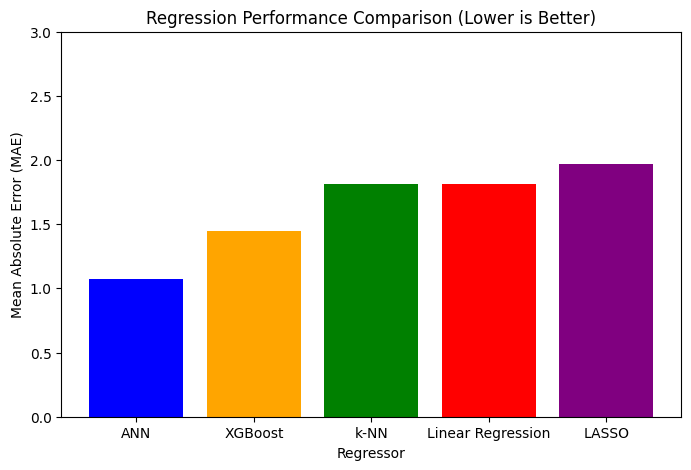

In [13]:
# ✅ Regression results
regressors = ['ANN', 'XGBoost', 'k-NN', 'Linear Regression', 'LASSO', ]
mae_scores = [1.07, 1.45,1.81, 1.81, 1.97]  # Set 0 for missing models

plt.figure(figsize=(8, 5))
plt.bar(regressors, mae_scores, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'gray'])
plt.xlabel("Regressor")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Regression Performance Comparison (Lower is Better)")
plt.ylim(0, 3)
plt.show()


In [1]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(224,224,3)),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')  # Output layer for classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\SWAGA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Dropout(0.3),  # Drops 30% of neurons
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Drops 50% of neurons
    Dense(10, activation='softmax')
])


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory("path_to_train_data/", target_size=(224,224), batch_size=32, class_mode='categorical')


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path_to_train_data/'

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping])
